# Assignment 3.2 (Python programming)

### In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. 
### Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. 
### This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.
### You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn.metrics as metrics
from math import sqrt
from sklearn import linear_model
import random

In [2]:
# import csv file into a dataframe
df = pd.read_csv ('dodgers-2022.csv') 
print(df)

   month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0    APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1    APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2    APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3    APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4    APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
..   ...  ...     ...         ...      ...   ...     ...       ...  ..   ...   
76   SEP   29   40724    Saturday  Rockies    84  Cloudy     Night  NO    NO   
77   SEP   30   35607      Sunday  Rockies    95  Clear        Day  NO    NO   
78   OCT    1   33624      Monday   Giants    86  Clear      Night  NO    NO   
79   OCT    2   42473     Tuesday   Giants    83  Clear      Night  NO    NO   
80   OCT    3   34014   Wednesday   Giants    82  Cloudy     Night  NO    NO   

   fireworks bobblehead  
0         NO 

#### Use this data to make a recommendation to management on how to improve attendance. 
#### Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. 

In [3]:
# look at all the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


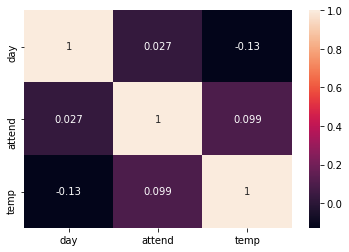

In [4]:
# To find the correlations between the variables/features, a correlation matrix of the df is used
# A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.
correlation_mat = df.corr()
# using the correlation_mat above, create a visualization using a heatmap
sns.heatmap(correlation_mat, annot = True)
plt.show()

### Findings: The above correlation matrix only shows the relationship between the numerical values or non-categorical variables
### Next Steps: To find the relation between the categorical and non-categorical (numeric) variables, the Spearman correlation matrix is used

In [5]:
# To support the Spearman Correlation Matrix, create dummy variables for the object type columns to get all the drop-down options into their own columns
df = pd.concat([df.drop(['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], axis=1), pd.get_dummies(df[['month', 'day_of_week', 'opponent','skies','day_night', 'cap', 'shirt', 'fireworks']])], axis=1)
df.head(5)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES
0,10,56000,67,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,1
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0


In [6]:
# Create a Spearman Correlation Matrix: Relationship between the categorical and non-categorical variables
df.corr('spearman').style.background_gradient(cmap="Blues")

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES
day,1.000000,0.063626,-0.123692,0.104875,-0.028569,-0.079586,0.108461,0.153172,-0.293820,-0.113057,0.134612,-0.119007,0.083503,0.035273,0.172376,-0.090701,-0.165867,-0.106335,0.179090,0.141313,0.319518,0.038556,-0.237854,-0.216080,0.159502,0.130490,0.225262,-0.188335,0.053167,-0.131519,-0.264438,-0.021860,0.052969,0.029382,0.054252,-0.054252,0.052377,-0.052377,0.194109,-0.194109,0.037777,-0.037777,-0.091546,0.091546
attend,0.063626,1.000000,0.090628,-0.055739,0.101270,0.096614,0.314192,-0.223536,-0.109043,-0.109991,-0.030209,-0.325514,0.128028,0.051787,-0.008776,0.333736,-0.167959,0.204106,-0.156575,-0.167758,-0.134038,0.015034,0.109043,-0.086529,0.002796,0.248580,0.204106,0.038644,-0.011184,-0.082481,-0.030756,-0.082328,-0.089049,0.139799,0.144553,-0.144553,0.031944,-0.031944,0.051039,-0.051039,-0.139799,0.139799,-0.015361,0.015361
temp,-0.123692,0.090628,1.000000,-0.495820,0.296848,0.012656,-0.132964,-0.337159,0.268880,0.527833,-0.167878,-0.024568,-0.044672,0.237768,0.014286,-0.020895,0.010423,-0.184855,-0.226868,-0.278683,-0.059812,0.181659,0.082625,0.196922,0.032210,0.076901,-0.079824,-0.010099,-0.025208,-0.273081,-0.092428,0.161577,0.167468,-0.102230,0.259024,-0.259024,0.249189,-0.249189,-0.066466,0.066466,-0.011203,0.011203,0.178363,-0.178363
month_APR,0.104875,-0.055739,-0.495820,1.000000,-0.198811,-0.173913,-0.147442,-0.222911,-0.081786,-0.173913,0.007013,-0.076087,0.007013,0.007013,0.037438,0.007013,0.021739,-0.081786,-0.081786,0.470270,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,-0.095050,0.470270,0.184302,-0.081786,0.470270,-0.081786,-0.147442,-0.147442,-0.081786,-0.343251,0.343251,0.069584,-0.069584,0.066354,-0.066354,-0.102233,0.102233,0.006808,-0.006808
month_AUG,-0.028569,0.101270,0.296848,-0.198811,1.000000,-0.198811,-0.168550,-0.254824,-0.093495,-0.198811,0.051309,-0.019881,-0.035275,-0.035275,0.009782,-0.035275,0.069584,-0.093495,-0.093495,-0.093495,-0.108657,-0.146625,0.411377,0.134840,0.411377,-0.108657,-0.093495,-0.168550,-0.093495,-0.093495,-0.093495,0.134840,0.134840,-0.093495,0.188903,-0.188903,0.018182,-0.018182,-0.128951,0.128951,0.093495,-0.093495,-0.034245,0.034245
month_JUL,-0.079586,0.096614,0.012656,-0.173913,-0.198811,1.000000,-0.147442,-0.222911,-0.081786,-0.173913,-0.087664,0.119565,-0.087664,0.007013,-0.106966,0.101690,0.021739,-0.081786,-0.081786,-0.081786,-0.095050,-0.128262,-0.081786,-0.147442,-0.081786,0.065347,-0.081786,0.184302,0.470270,-0.081786,0.470270,-0.147442,0.073721,-0.081786,-0.097204,0.097204,-0.019881,0.019881,-0.157591,0.157591,0.081786,-0.081786,0.006808,-0.006808
month_JUN,0.108461,0.314192,-0.132964,-0.147442,-0.168550,-0.147442,1.000000,-0.188982,-0.069338,-0.147442,0.059456,-0.036860,0.059456,-0.047565,0.072548,-0.047565,-0.036860,0.554700,-0.069338,-0.069338,-0.080582,-0.108740,-0.069338,-0.125000,-0.069338,0.463348,-0.069338,-0.125000,-0.069338,-0.069338,-0.069338,-0.125000,-0.125000,0.554700,0.103011,-0.103011,0.033710,-0.033710,0.056254,-0.056254,-0.138675,0.138675,-0.046176,0.046176
month_MAY,0.153172,-0.223536,-0.337159,-0.222911,-0.254824,-0.222911,-0.188982,1.000000,-0.104828,-0.222911,0.008989,0.027864,0.008989,0.008989,-0.013710,0.008989,-0.055728,-0.104828,0.366900,-0.104828,0.426401,0.152656,-0.104828,0.094491,-0.104828,-0.121829,-0.104828,-0.188982,-0.104828,-0.104828,-0.104828,0.094491,0.000000,-0.104828,0.155738,-0.155738,-0.101929,0.10

### Findings: *From Spearman's Correlation Matrix above
$\bullet$ A positive correlation is a relationship between two variables that move in the same direction. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.<br>
$\bullet$ Negative correlation describes when two variables tend to move in opposite size and direction from one another, such that when one increases the other variable decreases, and vice-versa.<br>
$\bullet$ Attendance is highly postively correlated to: the months of June, July & August, Tuesday & Saturday games, games against the Angels, Cubs, Mets, Nationals & White Sox, games on clear sky days, and game days when free shirts are given out.<br>
$\bullet$ Attedance is highly negatively correlated to: the months of April, May, September & October, Wednesday & Monday games, games against the Astros, Braves, Bruins, Pirates, Rockies & Snakes, games on cloudy days, and game days when no free shirts are given out.

### Recommendations: 
##### To increase attendance at LA Dodgers games, Dodgers management should specifically take the following recommendations into consideration: 
$\bullet$ Games played in the summer months and on clear sky days tend to be positively correlated with attendance, however management does not have control over these seasonality & weather factors so the only recommendation is to schedule more games (if possible) in the summer months and on weeks with historically clear sky days in Los Angeles. And, to schedule less games in the spring or fall and historically cloudy weeks in Los Angeles. <br>
$\bullet$ Games scheduled on Tuesday and Saturday tend to be positively correlated with attendance, while Wednesday & Monday games tend tend to be negatively correlated with attendance. Therefore, if the Dodgers management could schedule more games on Tuesdays & Saturdays, this could potentially increase attendance in the season. <br>
$\bullet$ Games played against the Angels, Cubs, Mets, Nationals & White Sox tend to be postively correlated with attendance. If it is possible to schedule more Dodgers games against these teams (and less with Astros, Braves, Bruins, Pirates, Rockies & Snakes), that would have a greater chance of increasing Dodgers games attendance in the MLB season.<br>
$\bullet$ And finally, games where free t-shirts are given out tend to be postively correlated with attendance, while games where no free t-shirts are negatively correlated. Interestingly, free baseball hats and bobleheads have a weak correlation to attendance. Dodgers management should plan to give out more free t-shirts if they want an increase in attendance in the season.<br>